# The "SPARKS FOUNDATION"- GRIP

# Data Science and Business Analytics - SEPT'2022

***BY- ADEEBA RASHID***

**TASK 6 : Prediction using Decision Tree Algorithm**

DATASET USED -
    * [https://bit.ly/3kXTdox]

**PROBLEM STATEMENT**
* Create the Decision Tree classifier and visualize it graphically.
● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# IMPORTING LIBRARIES

In [1]:
import pandas as pd   # Library for Data Manipulation and Analysis.
import numpy as np   # Library for scientific computing. It is an array-processing package.
import seaborn as sns   # Library for making statistical graphics
import matplotlib.pyplot as plt   # Library for Data Visualization.
%matplotlib inline
import warnings   # To ignore warnings
warnings.filterwarnings("ignore")

# Reading data

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
#Fetchinf 5 rows and columns from the data set

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Fetching last five rows and columns from the dataset

iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Describing dataset

In [6]:
# Fetching numerical information like Total datapoints count, mean value,etc. from the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# DATA VISUALIZATION

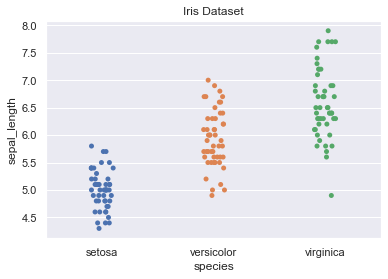

In [7]:
# Using Strip Plot to draw a scatter plot of the dataset
sns.set(style = 'darkgrid')
iris1 = sns.load_dataset('iris');
ax = sns.stripplot(x ='species', y ='sepal_length', data = iris1);
plt.title('Iris Dataset')
plt.show()

Since, each classes (Species) has equal number of data points, So our Iris data is said to be a Balanced dataset.

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

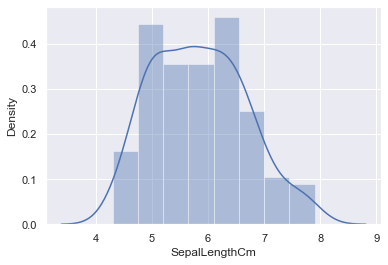

In [8]:
sns.distplot(iris['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

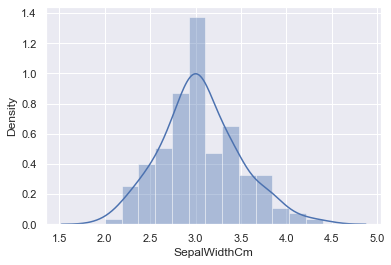

In [9]:
sns.distplot(iris['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Density'>

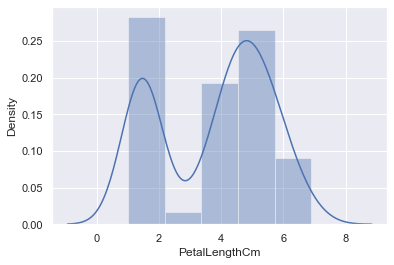

In [10]:
sns.distplot(iris['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

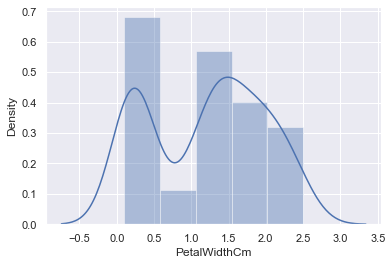

In [11]:
sns.distplot(iris['PetalWidthCm'])

# Plotting Correlation

<AxesSubplot:>

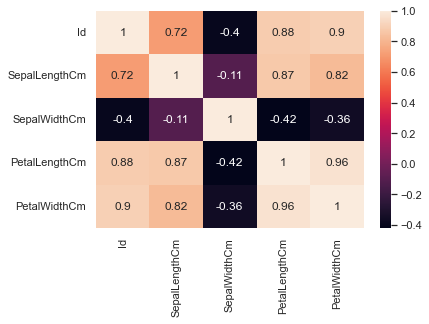

In [12]:
sns.heatmap(iris.corr(), annot = True)

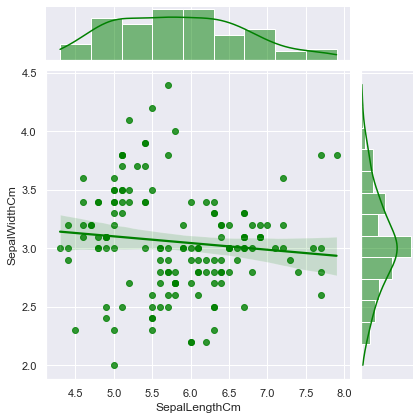

In [13]:
sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", kind="reg", color='green')


Here, I've used join plot to visualize the relation between two variables.

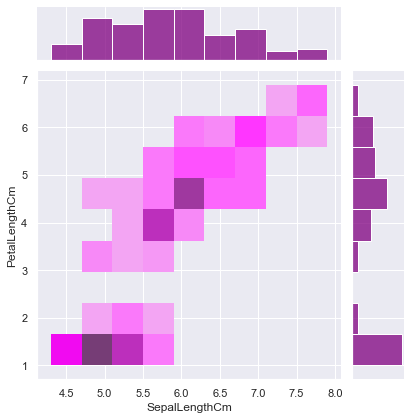

In [14]:
sns.jointplot(data=iris, x="SepalLengthCm", y="PetalLengthCm", kind="hist", color='purple')

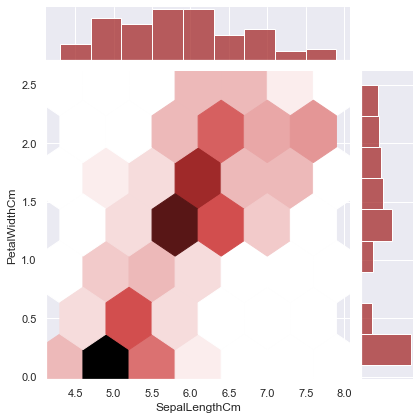

In [15]:
sns.jointplot(data=iris, x="SepalLengthCm", y="PetalWidthCm", kind="hex", color='brown')

# Observation

 Darker Hexagons refer to Higher Concentration & Lighter Hexagons refer to Lower Concentration

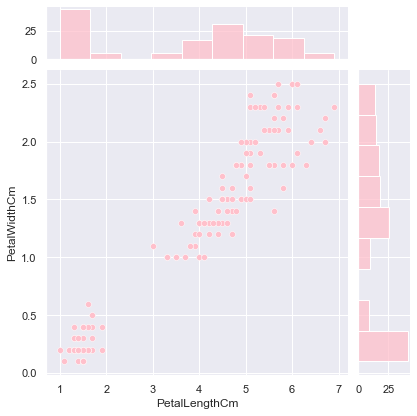

In [16]:
sns.jointplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", marginal_ticks=True, color='pink')

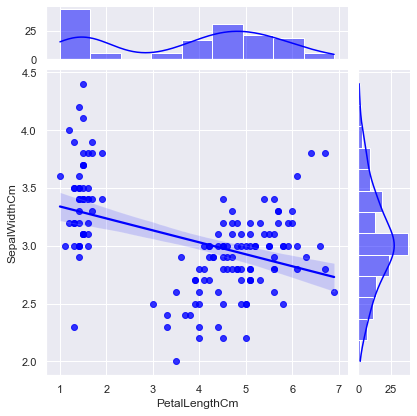

In [17]:
sns.jointplot(data=iris, x="PetalLengthCm", y="SepalWidthCm", kind='reg', marginal_ticks=True, color='blue')

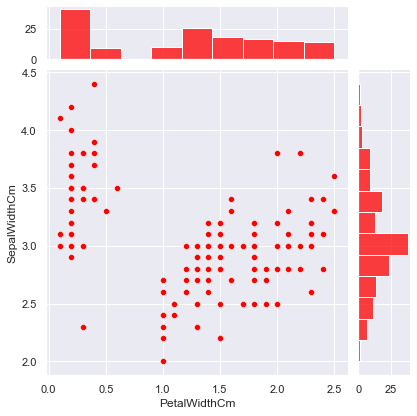

In [18]:
sns.jointplot(data=iris, x="PetalWidthCm", y="SepalWidthCm", marginal_ticks=True, color='red')

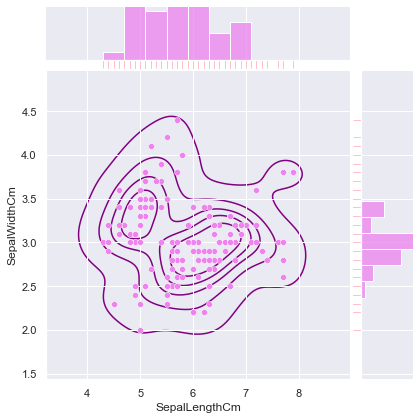

In [19]:
# Using KDEplot for plotting the data against a univariate variable.
# Using Rug plot to draw small bars along x-axis for each point in the dataset.
# jp stands for Joint Plot
jp = sns.jointplot(data=iris, x="SepalLengthCm", y="SepalWidthCm", color='violet')
jp.plot_joint(sns.kdeplot, color="purple", zorder=0, levels=6)
jp.plot_marginals(sns.rugplot, color="pink", height=-.15, clip_on=False)

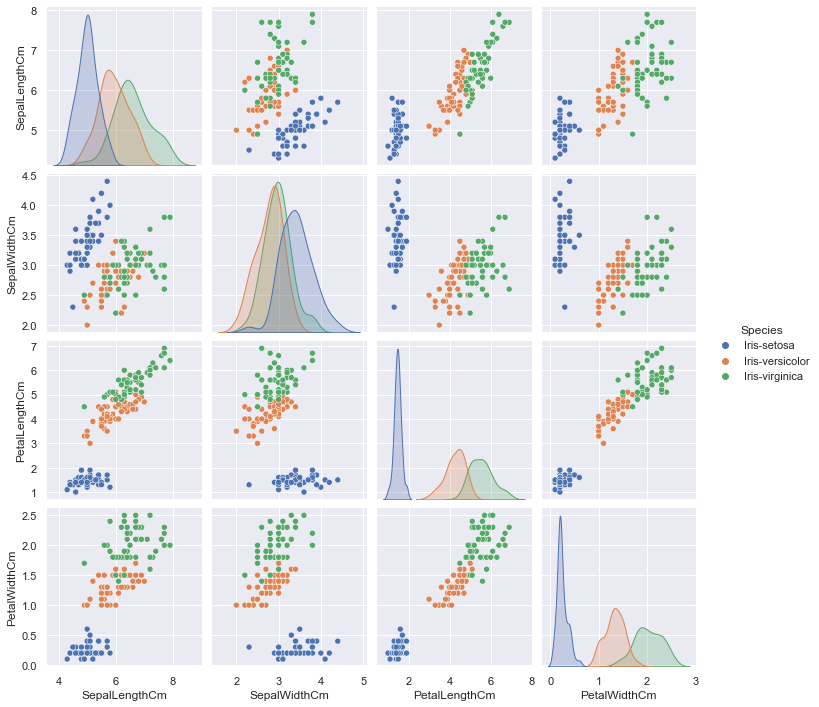

In [20]:
sns.pairplot(iris.drop(['Id'], axis = 1), hue = 'Species')

# Observation

Clusters of Species 'versicolor' and 'virginica' are closely related, whereas 'setosa' is more distinct.
From the result of pair plot, it is observed that all blue points are well separated with other two classes.
But Versicolor and virginica are partially overlapping with each other. 
Also in pair plot, there are some feature combination which has very less overlapping between Versicolor and virginica,
so these features are vital for our classification task purpose.

# Feature Engineering

In [21]:
# Feature engineering is all about creation of new features from existing features. 
# By taking the difference of each feature with each other to get some more information and then visualizing  it by using plots.
iris['SepalDiffCm'] = iris['SepalLengthCm'] - iris['SepalWidthCm']
iris['PetalDiffCm'] = iris['PetalLengthCm'] - iris['PetalWidthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalDiffCm,PetalDiffCm
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1


In [22]:
iris['SepalPetalLenDiff'] = iris['SepalLengthCm'] - iris['PetalLengthCm']
iris['SepalPetalWidthDiff'] = iris['SepalWidthCm'] - iris['PetalWidthCm']
iris['SepalPetalLenWidthDiff'] = iris['SepalLengthCm'] - iris['PetalWidthCm']
iris['SepalPetalWidthLenDiff'] = iris['SepalWidthCm'] - iris['PetalLengthCm']
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalDiffCm,PetalDiffCm,SepalPetalLenDiff,SepalPetalWidthDiff,SepalPetalLenWidthDiff,SepalPetalWidthLenDiff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


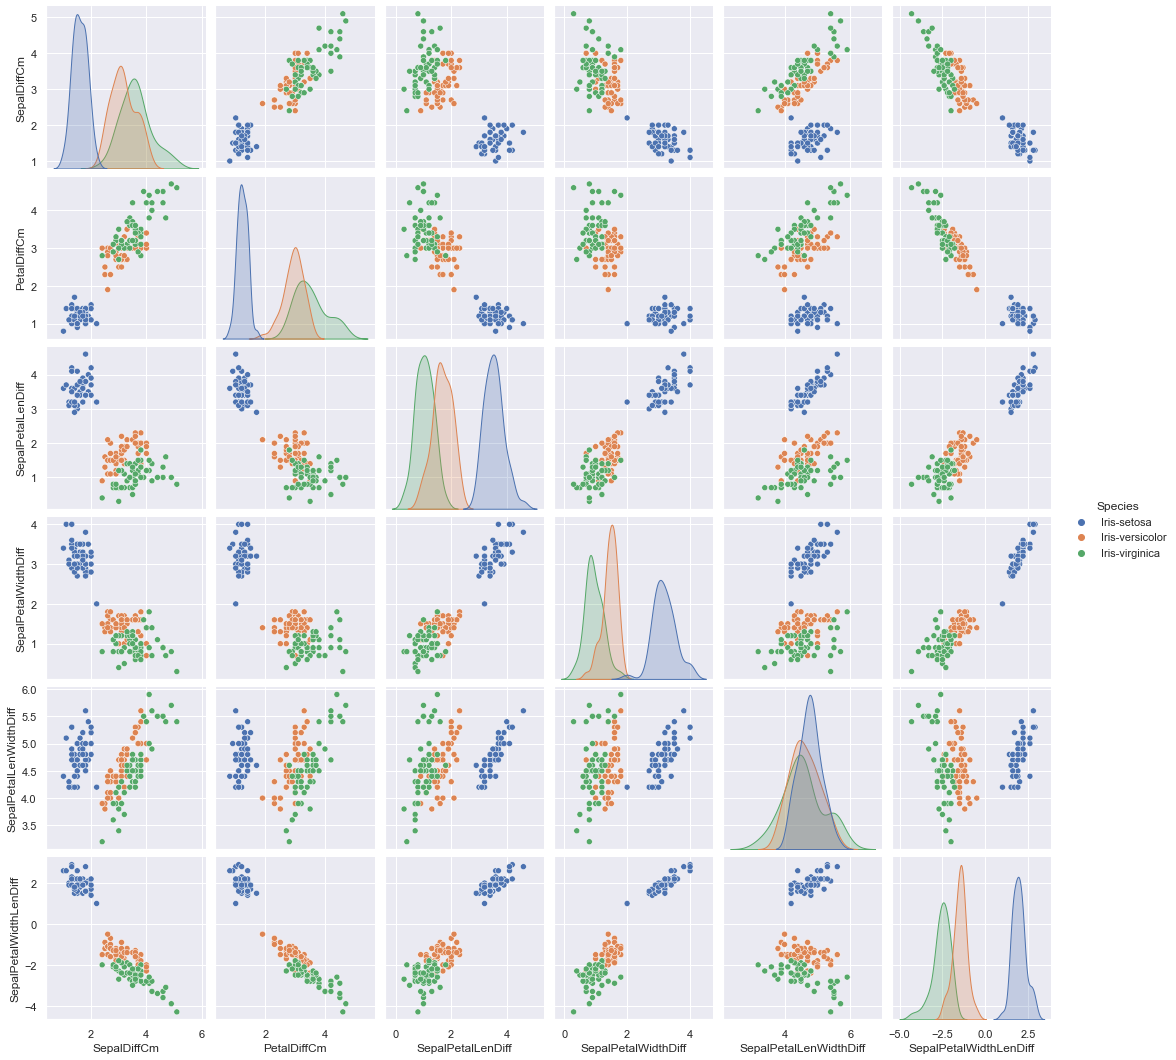

In [23]:
sns.pairplot(iris[['Species','SepalDiffCm','PetalDiffCm','SepalPetalLenDiff','SepalPetalWidthDiff','SepalPetalLenWidthDiff',
'SepalPetalWidthLenDiff']], hue = 'Species')

It is observed that the information generated from new feature is almost similar to our main features.
Each combination separates the Iris-setosa but has some overlapping between Versicolor and virginica.

# Building classification Model

In [24]:
# Dropping id column from the dataset
iris.drop(['Id'], axis = 1, inplace = True)

# Importing libraries

In [25]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
# Seperating dependent and independent variable from the dataset

X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','SepalPetalLenWidthDiff','SepalPetalWidthLenDiff']]
y = iris['Species']

In [27]:
# Splitting our data into training, testing and validation set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [28]:
#splitting data into validation train and validation test set

Xt,Xcv,yt,ycv = train_test_split(X_train,y_train,test_size = 0.1, random_state = 42)

In [29]:
# Creating decision tree classifier and training it with training set

dtr = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2)
dtr.fit(Xt,yt)

DecisionTreeClassifier()

# Visualization

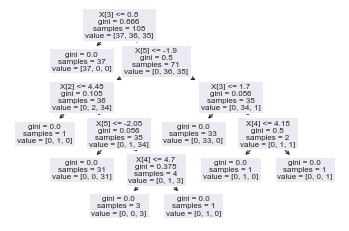

In [30]:

tree.plot_tree(dtr)
plt.rcParams['figure.figsize']=(20,20)

# Finding new data to predict class

In [31]:
# Testing our model on a random test case
# Predicted label should be Iris-virginica
trial = np.array([[7.2,3.0,5.8,1.6,5.6,-2.8]]) 
pred_trial = dtr.predict(trial)
pred_trial

array(['Iris-virginica'], dtype=object)

# Visualization of Decision Tree

In [32]:
# Now our model has been trained
# Perform validation of Decision tree using cross validation method to get the accuracy score of model.
print('Accuracy: ', cross_val_score(dtr , Xt , yt , cv = 3 , scoring = 'accuracy').mean())

Accuracy:  0.9351851851851851


In [33]:
# Check validation test data on trained model and get performance metrics
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score
y_hat = dtr.predict(Xcv)

print('Accuracy of validation test data is:', accuracy_score(ycv,y_hat))
multilabel_confusion_matrix(ycv,y_hat)

Accuracy of validation test data is: 0.8333333333333334


array([[[9, 0],
        [0, 3]],

       [[7, 0],
        [2, 3]],

       [[6, 2],
        [0, 4]]], dtype=int64)

In [34]:
# Check model performance on unseen test data

yt_hat = dtr.predict(X_test)
yt_hat

print('Accuracy score for unseen test data is:',accuracy_score(y_test,yt_hat)*100,'%' )
multilabel_confusion_matrix(y_test,yt_hat)

Accuracy score for unseen test data is: 96.66666666666667 %


array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 1,  8]],

       [[18,  1],
        [ 0, 11]]], dtype=int64)

In [35]:
target = list(iris.Species.unique())
target

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

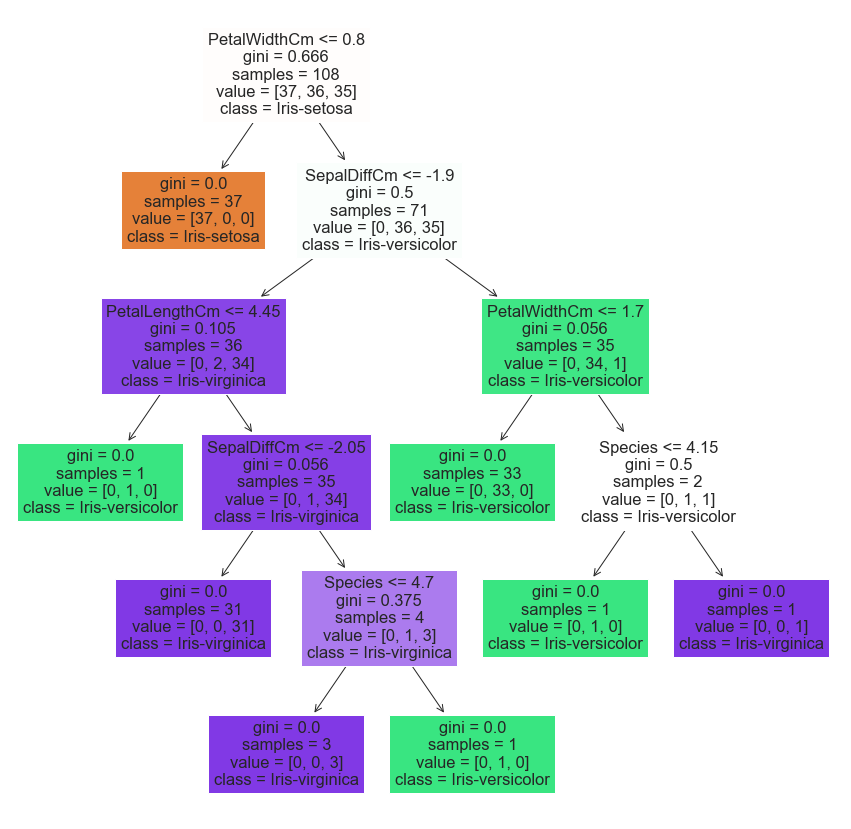

In [36]:
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(dtr, feature_names=iris.columns, class_names=target, filled=True)
plt.rcParams['figure.figsize']=(15,15)

# Here, we come to an end of our task.